**Linear Regression**

slope=0.5059
y_intercept=1.9764
the required line is y=0.5059x+1.9764


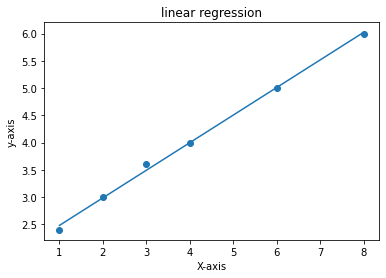

[2.4 3.  3.6 4.  5.  6. ]
2.4823
2.9882
3.4941
4.0
5.0118
6.0236
cost function of the line is 0.0188
The regression is 8.7018
total error is 8.72
The Goodness of fit model 0.9978


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def mean(x):
    len=0
    sum=0
    for i in x:
        len+=1
        sum+=i
    return sum/len
x=np.array([1,2,3,4,6,8])
y=np.array([2.4,3,3.6,4,5,6])
#x=np.array([1,2,3,4,5])
#y=np.array([2.0,2.6,3.8,]])
x_bar=mean(x)
y_bar=mean(y)
num=0
den=0
length=len(x)
for i in range(length):
    num+=((x[i]-x_bar)*(y[i]-y_bar))
    den+=(x[i]-x_bar)**2
slope=num/den
slope=slope.round(4)
print(f"slope={slope}")
y_intercept=y_bar-(slope*x_bar)
y_intercept=y_intercept.round(4)
print(f"y_intercept={y_intercept}")
print(f"the required line is y={slope}x+{y_intercept}")
plt.scatter(x,y)
plt.xlabel("X-axis")
plt.ylabel("y-axis")
plt.title("linear regression")
plt.plot(x,slope*x+y_intercept)
plt.show()
sse=0
sst=0
ssr=0
for i in range(length):
    sse=sse+(y[i]-(slope*x[i]+y_intercept))**2
    sst+=(y_bar-y[i])**2
    ssr+=((slope*x[i]+y_intercept)-y_bar)**2
print(y)
for i in range(length):
    print(slope*x[i]+y_intercept)
sse=sse.round(4)
ssr=ssr.round(4)
r_square=1-(sse/sst)
r_square=r_square.round(4)
print(f"cost function of the line is {sse}")
print(f"The regression is {ssr}")
print(f"total error is {sst}")
print(f"The Goodness of fit model {r_square}")

***CO-RELATION METHODS***

**Co-Relation Coefficient**

In [ ]:
x=np.array([65,66,67,67,68,69,70,72])
y=np.array([67,68,65,68,72,72,69,71])
n=len(x)
xy=0
xt=0
yt=0
xx=0
yy=0
for i in  range(len(x)):
    xy+=x[i]*y[i]
    xx+=x[i]*x[i]
    xt+=x[i]
    yt+=y[i]
    yy+=y[i]*y[i]
m=(n*xy)-(xt*yt)
e=((n*xx)-(xt**2))*((n*yy)-(yt**2))
e=e**0.5
w=m/e
w=w.round(4)
print(f"corrleation coefficent {w}")

corrleation coefficent 0.603


**Rank Co-Relation Coefficient**

In [1]:
# rank corelation coefficient

import numpy as np
cf=[]
def find_rank(l):
    r={}
    s=list(set(l))
    w=l.copy()
    s.sort(reverse=True)
    w.sort(reverse=True)
    a=1
    for i in s:
        m=l.count(i)
        if m==1:
            r[i]=a
            a+=1
        else:
            q=0
            for j in range(m):
                q+=a
                a+=1
            r[i]=q/m
            cf.append(m*(m**2-1)/12)
    return r

x=[68,64,75,50,64,80,75,40,55,64]
y=[62,58,68,45,81,60,68,48,50,70]
x_rank=find_rank(x)
y_rank=find_rank(y)
n=len(x)
d=[]
for i in range(n):
    d.append(x_rank[x[i]]-y_rank[y[i]])

d_2=[i*i for i in d]
if len(cf)!=0:
    sum_d_2=sum(d_2)+sum(cf)
else:
    sum_d_2=sum(d_2)
print(d)
print(d_2)
print(x_rank)
print(cf)
print(sum_d_2)
num=6*sum_d_2
den=n*(n**2 - 1)
print(num)
print(den)
rankcorelation=1 - num/den
print("Rank corelation is {:.5f}".format(rankcorelation))

[-1, -1.0, -1.0, -1, 5.0, -5, -1.0, 1, 0, 4.0]
[1, 1.0, 1.0, 1, 25.0, 25, 1.0, 1, 0, 16.0]
{80: 1, 75: 2.5, 68: 4, 64: 6.0, 55: 8, 50: 9, 40: 10}
[0.5, 2.0, 0.5]
75.0
450.0
990
Rank corelation is 0.54545


**ANOVA ONE-WAY**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as s
print("ANOVA ONE WAY CLASSIFICATION")
deg=float(input("Enter the degrees of freedom:"))
tn=int(input("Enter the no.of Treatments: "))
f_list=[]
d=[]
for i in range(tn):
  l=[float(j) for j in input().split()]
  d.append(len(l))
  f_list.append(l)
#print(f_list)
ti=[]
for i in f_list:
  ti.append(sum(i))
#print(ti)
ti_sum=sum(ti)
#print(ti_sum)
ti2_ni=[]
for i in range(len(ti)):
  ti2_ni.append((ti[i]**2)/d[i])
#print(ti2_ni)
#print(sum(ti2_ni))
rss=0.0
for i in f_list:
  for j in range(len(i)):
    rss+=(i[j]**2)
cf=(ti_sum**2)/sum(d)
sst=rss-cf
sstr=sum(ti2_ni)-cf
sse=sst-sstr
print("The row sum of squares: ",rss)
print("The correction factor:",cf)
print("sum of squares due to total:",sst)
print("sum of squares due to treatments:",sstr)
print("sum of squares due to error:",sse)
#print("sst:{},sstr:{},sse:{}".format(sst,sstr,sse));
#Constructing a dataframe
df=pd.DataFrame()
df["source of variation"]=["treatments","errors","total"]
df["sum of squares"]=[sstr,sse,sst]
x=(tn-1)
y=sum(d)-tn
z=sum(d)-1
df["Degrees of freedom"]=[x,y,z]
x1=sstr/x
y1=sse/y
df["Mean sum of Squares"]=[x1,y1,"*"]
f=x1/y1
df["Variance ratio"]=["*",f,"*"]
print(df)
if f<1:
  f=1/f
  tv=s.f.ppf(1-deg,y,x)
else:
  tv=s.f.ppf(1-deg,x,y)
print("f is :",f)
print("The table value is:",tv)  
#Inference or decision
if f>=tv:
  print("Reject the Null Hypothesis")
else:
  print("Accept the NUll Hypothesis")
#13 10 8 11 8
#13 11 14 14
#4 1 3 4 2 4

ANOVA ONE WAY CLASSIFICATION
Enter the degrees of freedom:0.05
Enter the no.of Treatments: 3
13 10 8 11 8
13 11 14 14
4 1 3 4 2 4
The row sum of squares:  1262.0
The correction factor: 960.0
sum of squares due to total: 302.0
sum of squares due to treatments: 270.0
sum of squares due to error: 32.0
  source of variation  sum of squares  Degrees of freedom Mean sum of Squares  \
0          treatments           270.0                   2               135.0   
1              errors            32.0                  12            2.666667   
2               total           302.0                  14                   *   

  Variance ratio  
0              *  
1         50.625  
2              *  
f is : 50.625
The table value is: 3.8852938346523933
Reject the Null Hypothesis


In [ ]:
# using SCIPY python library

import scipy.stats as st

a=[13,10,8,11,8]
b=[13,11,14,14]
c=[4,1,3,4,2,4]
st.f_oneway(a,b,c)

F_onewayResult(statistic=50.625, pvalue=1.415331629132145e-06)

**ANOVA TWO-WAY**

In [ ]:
import scipy.stats as stats
print("Enter level of significance")
alpha=float(input())
print("Enter number of treatments")
t=int(input())
print("Enter number of blocks")
b=int(input())
l=[]
ti=[]
ti2ni=[]
for i in range(t):
    p=list(map(int,input().split()))
    ti.append(sum(p))
    ti2ni.append(sum(p)**2)
    l.append(p)
sti2=sum(ti2ni)
blocks=[]
squared_blocks=[]
for i in range(b):
  s=0
  for k in range(t):
    s+=l[k][i]
  blocks.append(s)
  squared_blocks.append(s**2)
G=sum(blocks)
sbi2=sum(squared_blocks)
m=[]
for i in l:
  m.extend(i)
rss=0
for i in m:
  rss+=i**2
cf=(G**2) / len(m)
st2=rss-cf
str2=(sti2/b) - cf
sb2=(sbi2/t) - cf
se2=st2 - str2 - sb2
dft=t-1
dfb=b-1
dfe=dft*dfb
mst2=str2/dft
msb2=sb2/dfb
mse2=se2/dfe
ftr=mst2/mse2
fb=msb2/mse2
if ftr<1.0:
  ftr=(1.0/ftr)
  t_ftr=stats.f.ppf(1-alpha,dfe,dft)
  print(rss,cf,st2,str2,sb2,se2,ftr,fb)
  print("table value for treatments")
  print(t_ftr)
  if ftr>t_ftr:
    print("we reject treatments")
  else:
    print("we accept treatments")
else:
  t_ftr=stats.f.ppf(1-alpha,dft,dfe)
  print(rss,cf,st2,str2,sb2,se2,ftr,fb)
  print("table value for treatments")
  print(t_ftr)
  if ftr>t_ftr:
    print("we reject treatments")
  else:
    print("we accept treatments")
if fb<1.0:
  fb=(1.0/fb)
  t_fb=stats.f.ppf(1-alpha,dfe,dfb)
  print("Table value for blocks")
  print(t_fb)
  print(rss,cf,st2,str2,sb2,se2,ftr,fb)
  if fb>t_fb:
    print("we reject blocks")
  else:
    print("we accept blocks")
else:
  print(rss,cf,st2,str2,sb2,se2,ftr,fb)
  print("Table value for blocks")
  t_fb=stats.f.ppf(1-alpha,dfb,dfe)
  print(t_fb)
  if fb>t_fb:
    print("we reject blocks")
  else:
    print("we accept blocks")

Enter level of significance
0.05
Enter number of treatments
3
Enter number of blocks
4
13 7 9 3
6 6 3 1
11 5 15 5
786 588.0 198.0 56.0 90.0 52.0 3.230769230769231 3.4615384615384617
table value for treatments
5.143252849784718
we accept treatments
786 588.0 198.0 56.0 90.0 52.0 3.230769230769231 3.4615384615384617
Table value for blocks
4.757062663089414
we accept blocks


**Multilinear Regression**

In [ ]:
import scipy.stats as stats
def transportMatrix(a):
  res = [[a[j][i] for j in range(len(a))] for i in range(len(a[0]))]
  return res
import numpy as np
no_ind=int(input("Enter no of independent variables"))
indep=[]
for i in range(no_ind):
  print(f"Enter the values for independent variable {i+1}")
  li=[float(x) for x in input().split()]
  indep.append(li)
print("Enter the values of output")
y=[float(x) for x in input().split()]
alpha=float(input("Enter level of significance"))
x_trans=[]
x_trans.append(np.ones(len(indep[0])))
for i in range(len(indep)):
  x_trans.append(indep[i])
s1=np.dot(x_trans,transportMatrix(x_trans))
s2=np.linalg.inv(s1)
s3=np.dot(x_trans,y)
s4=np.dot(s2,s3)
s4=s4.round(4)
y_equ=[x.round(4) for x in s4]
y_equ=str(s4[0])
for i in range(1,no_ind+1):
    y_equ+='+'+str(s4[i])+'x'+str(i)
print()
print(f"The required multi linear regression is y={y_equ}")
print()

y_fit=[float(0) for i in range(len(indep[0]))]
for i in range(len(indep[0])):
    y_fit[i]=s4[0]
    k=0
    for j in range(1,no_ind+1):
        y_fit[i]+=s4[j]*indep[k][i]
        k+=1
y_fit=[x.round(4) for x in y_fit]
print("Fitted values are")
print(y_fit)
print()
sse=0
for i in range(len(y_fit)):
    sse+=(y[i]-(y_fit[i]))**2
sse=sse.round(4)
print(f"The sum of squares due to error is {sse}")
y_mean=np.mean(y).round(4)
sst=0
for i in range(len(y_fit)):
    sst+=(y[i]-y_mean)**2
sst=sst.round(4)
print(f"The sum of squares due to total is {sst}")
ssr=sst-sse
print(f"The sum of squares due to total is {ssr}")
print()
r_square=(ssr/sst).round(4)
print(f"The R^2 value is {r_square}")
print()
print("By using R^2 test")
if(r_square>=0.90):
    print("We accept the model")
else:
    print("We reject the model")
print()
m_ssr=(ssr/no_ind).round(4)
m_sse=(sse/(len(y_fit)-no_ind-1))
f_cal=(m_ssr/m_sse).round(4)
dfe=len(y_fit)-no_ind-1
print(f"The calucalted value of F is {f_cal}")
f_tab=stats.f.ppf(1-alpha,no_ind,dfe).round(4)
print(f"The table value of F is {f_tab}")
print()
print("By using ANOVA test")
if(f_cal>f_tab):
    print("We accept the model")
else:
    print("We reject the model")
print()
param_value=[]
for i in range(no_ind+1):
    temp=(s4[i]/((m_sse*s2[i][i])**0.5)).round(4)
    param_value.append(temp)
print(param_value)
t_table=stats.t.ppf(1-alpha/2,len(y_fit)-no_ind-1)
print(f"The table value of t : {t_table}")
i=0
for a in param_value:
    if(abs(a))>t_table:
        print("Beta"+str(i)+"is contributing to the model")
    else:
        print("Beta"+str(i)+"is not contributing to the model")
    i+=1

Enter no of independent variables2
Enter the values for independent variable 1
-5 -4 -1 2 2 3 3
Enter the values for independent variable 2
5 4 1 -3 -2 -2 -3
Enter the values of output
11 11 8 2 5 5 4
Enter level of significance0.05

The required multi linear regression is y=6.5714+1.0x1+2.0x2

Fitted values are
[11.5714, 10.5714, 7.5714, 2.5714, 4.5714, 5.5714, 3.5714]

The sum of squares due to error is 1.7143
The sum of squares due to total is 73.7143
The sum of squares due to total is 72.0

The R^2 value is 0.9767

By using R^2 test
We accept the model

The calucalted value of F is 83.9993
The table value of F is 6.9443

By using ANOVA test
We accept the model

[26.5579, 2.1523, 4.3046]
The table value of t : 2.7764451051977987
Beta0is contributing to the model
Beta1is not contributing to the model
Beta2is contributing to the model


**Multivariate Regression**

In [ ]:
import numpy as np
q=int(input('Enter no. of dependent variables:'))
yt=[]
for i in range(q):
  print('Enter y'+str(i+1),'data')
  yt.append([float(j) for j in input().split()])

n=len(yt[0])
p=int(input('Enter no. of independent variables:'))
xt=[]
xt.append([1]*n)
for i in range(p):
  print('Enter x'+str(i+1),'data')
  xt.append([float(j) for j in input().split()])

p=p+1
g=float(input('Enter level of  significance: '))

def transpose(m):
    return [[m[j][i] for j in range(len(m))] for i in range(len(m[0]))]

def getMinor(m,i,j):
  return [p[:j]+p[j+1:] for p in m[:i]+m[i+1:]]

def getDeterminant(a):
  if len(a)==1:
    return a[0][0]
  if len(a)==2:
    return a[0][0]*a[1][1]-a[0][1]*a[1][0]
  det=0
  for c in range(len(a)):
    det+=(-1)**c*a[0][c]*getDeterminant(getMinor(a,0,c))
  return det

def coFactor(m):
  return [[(-1)**(i+j)*getDeterminant(getMinor(m,i,j))for j in range(len(m))] for i in range(len(m))]

def Inverse(m):
  det=getDeterminant(m)
  if det==0: print('det=0,Inverse not posssible');exit()
  adj=transpose(coFactor(m))
  return [[adj[i][j]/det for j in range(len(adj[0]))] for i in range(len(adj))]

def Multiply(a,b):
    r1,c1,r2,c2=len(a),len(a[0]),len(b),len(b[0])
    if c1!=r2: print('Multiplication not possible');exit()
    mm=[]
    for i in range(0,r1):
        c=[]
        for j in range(0,c2):
            p=0
            for k in range(0,c1):
                p=p+(a[i][k]*b[k][j])
            c.append(p)
        mm.append(c)
    return mm

x=transpose(xt)
y=transpose(yt)
xtxi=Inverse(Multiply(xt,x))
xty=Multiply(xt,y)
b=Multiply(xtxi,xty)

yt=np.array(yt)
xt=np.array(xt)

for i in range(q):
  print('\nFOR THE EQUATION y'+str(i+1),':')
  ye='y'+str(i+1)+' = '
  ye=ye+str('%.3f'%b[0][i])+' + '
  y1=np.array(b[0][i]*xt[0])
  f=0
  for j in range(1,p):
      ye=ye+str('(%.3f)'%b[j][i])+'x'+str(j);y1=y1+(b[j][i]*xt[j])
      if j!=p-1:ye=ye+' + '

  print('Model fit equation is ',ye)
  sse=np.sum((yt[i]-y1)**2)
  sst=np.sum((yt[i]-np.mean(yt[i]))**2)
  ssr=sst-sse
  print('\nUsing Coefficient of Determination Method: ')
  r2=ssr/sst
  print('R^2 = %.5f'%(r2))
  if(r2>0.90):print('Model fits good (R^2>0.90)')
  else:print('Model does not fit good (R^2<=0.90)')
  print('\nUSing ANOVA Test:')
  mssr=ssr/(p-1)
  msse=sse/(n-p)
  f=mssr/msse
  import scipy.stats as s
  if f>=1: ft=s.f.ppf(1-g,p-1,n-p)
  else: f=1/f;ft=s.f.ppf(1-g,n-p,p-1)
  print('Calculated value of f is %.5f'%(f))
  print('Table value of f is %.5f'%(ft))
  if f>ft: print('Model fits good')
  else: print('Model does not fit good')

  print('\nTest of Individual Parameters:')
  cjj=[xtxi[j][j] for j in range(len(xtxi))]
  tt=s.t.ppf(1-g/2,n-p)
  print('Table value of t is %.5f'%(tt))
  for j in range(p):
      e=np.sqrt(msse*cjj[j])
      t=b[j][i]/e
      q='b['+str(j)+']'
      print('t(cal) for',q,'is %.5f'%(t))
      if abs(t)>tt: print(q,'is contributing to the model')
      else: print(q,'is not contributing to the model')

Enter no. of dependent variables:2
Enter y1 data
10 12 11 9 9 10 11 12 11 10 11 12
Enter y2 data
100 110 105 94 95 99 104 108 105 98 103 110
Enter no. of independent variables:3
Enter x1 data
9 8 7 14 12 10 7 4 6 5 7 6 
Enter x2 data
62 58 64 60 63 57 55 56 59 61 57 60
Enter x3 data
1 1.3 1.2 0.8 0.8 0.9 1 1.2 1.1 1.0 1.2 1.2
Enter level of  significance: 0.05

FOR THE EQUATION y1 :
Model fit equation is  y1 = 10.897 + (-0.045)x1 + (-0.088)x2 + (5.035)x3

Using Coefficient of Determination Method: 
R^2 = 0.92380
Model fits good (R^2>0.90)

USing ANOVA Test:
Calculated value of f is 32.32738
Table value of f is 4.06618
Model fits good

Test of Individual Parameters:
Table value of t is 2.30600
t(cal) for b[0] is 4.23735
b[0] is contributing to the model
t(cal) for b[1] is -0.82835
b[1] is not contributing to the model
t(cal) for b[2] is -2.27524
b[2] is not contributing to the model
t(cal) for b[3] is 5.46181
b[3] is contributing to the model

FOR THE EQUATION y2 :
Model fit equation is

**Manova code-1**

In [ ]:
#manova function
import pandas as pd
import numpy as np
import scipy.stats as s
import math
def determinantOfMatrix(mat):
    if(len(mat) == 2):
        value = mat[0][0] * mat[1][1] - mat[1][0] * mat[0][1]
        return value

def manova(B,W,T,n,k,deg=0.05):
  df=pd.DataFrame()
  df["Source of variations"]=["regression","errors","total"]
  df["Sum of Squares"]=[B,W,T]

  x=(k-1)
  y=(n-k)
  z=(n-1)
  df["Degrees of freedom"]=[x,y,z]
  x1=determinantOfMatrix(W)
  x2=determinantOfMatrix(T)
  la=round(x1/x2,4)
  sqla=math.sqrt(la)
  df["Wilks value"]=[la,"*","*"]

  f=((n-k-1)*(1-sqla))/((k-1)*(sqla))
  df["F test"]=["*",f,"*"]
  print(df)
  tv=s.f.ppf(1-deg,2*x,2*(n-k-1))

  print("")
  print("The f value is:",f)
  print("The table value is:",tv)

  if(f>=tv):
      print("Reject the Null Hypothesis")
  else:
      print("Accept the Null Hypothesis")

def thmatrix(a,b,c):
  l=[[0,0],[0,0]]
  for i in range(2):
    for j in range(2):
      if i==0 and j==0:
        l[i][j]=a
      elif i==1 and j==1:
        l[i][j]=c
      else:
        l[i][j]=b
  return l

In [ ]:
import numpy as np
#t=[]
#for i in range(int(input("enter the no of treatments: "))):
#   l=int(input("enter the no of lists: "))
#  tr=[]
#  for i in range(l):
#    tr.append(list(map(int,input().split())))
#  t.append(tr)
#print(t)
t=[[[9, 3], [6, 2], [9, 7]], [[0, 4], [2, 0]], [[3, 8], [1, 9], [2, 7]]]
t1=[]
for i in t:
  t1.extend(i)
print(t1)
print()
l1=[]
for i in t:
  a=np.array(i)
  b=np.mean(a,axis=0)
  l1.append(list(b))
print("l1 is=",l1)
l2=[]
a=np.array(t1)
b=np.mean(a,axis=0)
l2.append(list(b))
print("l2 is=",l2)

def Extract(lst,i):
    return list(list(zip(*lst))[i])
print("e is:",Extract(t1,0))
print("e is:",Extract(t1,1))

def ssey(l,a,t):
  c=0
  s=0
  cou=[]
  for j in t:
    cou.append(c+len(j))
    c=len(j)
  print("cou=",cou)
  c=0
  c1=0
  for i in range(len(l)):
    s=s+(l[i]-a[c])**2
    if i==cou[c1]-1:
      c1+=1
      c+=1
    #print("s is:",s)
  return (s)

def sst(l,x):
  s=0
  # print(l,"L",x,"x")

  for i in l:
    s=s+(i-x)**2
  # print(s)
  return s
def sseyy(t1,y1,t):
  c=0
  s=0
  cou=[]
  for j in t:
    cou.append(c+len(j))
    c=len(j)
  c=0
  c1=0
  for i in range(len(t1)):
    s+=(t1[i][0]*t1[i][1])-(y1[c][0]*y1[c][1])
    if i==cou[c1]-1:
      c1+=1
      c+=1
  print("s is",s)
  return s
def sstyy(t1,l2):
  s=0
  for i in t1:
    s+=(i[0]*i[1])-(l2[0][0]*l2[0][1])
  # print(s)
  return s

ssey1=ssey(Extract(t1,0),Extract(l1,0),t)
print("ssey1 is:",ssey1)
ssey2=ssey(Extract(t1,1),Extract(l1,1),t)
ssty1=sst(Extract(t1,0),l2[0][0])
ssty2=sst(Extract(t1,1),l2[0][1])
ssry1=ssty1-ssey1
ssry2=ssty2-ssey2
# print(l1)
ssey1y2=sseyy(t1,l1,t)
ssty1y2=sstyy(t1,l2)
ssry1y2=ssty1y2-ssey1y2
# print(ssry1y2)
print()
B=thmatrix(ssry1,ssry1y2,ssry2)
print(B)
W=thmatrix(ssey1,ssey1y2,ssey2)
print(W)
T=thmatrix(ssty1,ssty1y2,ssty2)
print(T)
print
manova(B,W,T,len(t1),len(t[0]),deg=0.05)

[[9, 3], [6, 2], [9, 7], [0, 4], [2, 0], [3, 8], [1, 9], [2, 7]]

l1 is= [[8.0, 4.0], [1.0, 2.0], [2.0, 8.0]]
l2 is= [[4.0, 5.0]]
e is: [9, 6, 9, 0, 2, 3, 1, 2]
e is: [3, 2, 7, 4, 0, 8, 9, 7]
cou= [3, 5, 5]
ssey1 is: 10.0
cou= [3, 5, 5]
s is 1.0

[[78.0, -12.0], [-12.0, 48.0]]
[[10.0, 1.0], [1.0, 24.0]]
[[88.0, -11.0], [-11.0, 72.0]]
  Source of variations                  Sum of Squares  Degrees of freedom  \
0           regression  [[78.0, -12.0], [-12.0, 48.0]]                   2   
1               errors      [[10.0, 1.0], [1.0, 24.0]]                   5   
2                total  [[88.0, -11.0], [-11.0, 72.0]]                   7   

  Wilks value    F test  
0      0.0385         *  
1           *  8.192944  
2           *         *  

The f value is: 8.19294382875251
The table value is: 3.837853354555897
Reject the Null Hypothesis


**Manova code-2**

In [ ]:
import numpy as np
from math import sqrt
import scipy.stats
n=int(input('Enter no. of treatments'))
x=[[9,3],[6,2],[9,7]]
y=[[0,4],[2,0]]
z=[[3,8],[1,9],[2,7]]
li=[]
lbar=[]
a=0
b=0
sum1=0
sum2=0
for i in range(len(x)):
  sum1=(sum1+x[i][0])
  a=(sum1/len(x))
  sum2=(sum2+x[i][1])
  b=(sum2/len(x))
li.append([a,b])
c=0
d=0
sum3=0
sum4=0
for i in range(len(y)):
  sum3=(sum3+y[i][0])
  c=(sum3/len(y))
  sum4=(sum4+y[i][1])
  d=(sum4/len(y))
li.append([c,d])
e=0
f=0
sum5=0
sum6=0
for i in range(len(z)):
  sum5=(sum5+z[i][0])
  e=(sum5/len(z))
  sum6=(sum6+z[i][1])
  f=(sum6/len(z))
li.append([e,f])
print(li)

g=(len(x)+len(y)+len(z))
lbar.append([((sum1+sum3+sum5)/g),((sum2+sum4+sum6)/g)])
print(lbar)
# for y1

sse1=0
for i in range(len(x)):
  sse1+=((x[i][0]-li[0][0])**2)
for i in range(len(y)):
  sse1+=((y[i][0]-li[1][0])**2)
for i in range(len(z)):
  sse1+=((z[i][0]-li[2][0])**2)
print('sse of y1:',sse1) 

sst1=0
for i in range(len(x)):
  sst1+=((x[i][0]-lbar[0][0])**2)
for i in range(len(y)):
  sst1+=((y[i][0]-lbar[0][0])**2)
for i in range(len(z)):
  sst1+=((z[i][0]-lbar[0][0])**2)
print('sst of y1:',sst1)

ssr1=sst1-sse1
print('ssr of y1:',ssr1)
# for y2

sse2=0
for i in range(len(x)):
  sse2+=((x[i][1]-li[0][1])**2)
for i in range(len(y)):
  sse2+=((y[i][1]-li[1][1])**2)
for i in range(len(z)):
  sse2+=((z[i][1]-li[2][1])**2)
print('sse of y2:',sse2) 

sst2=0
for i in range(len(x)):
  sst2+=((x[i][1]-lbar[0][1])**2)
for i in range(len(y)):
  sst2+=((y[i][1]-lbar[0][1])**2)
for i in range(len(z)):
  sst2+=((z[i][1]-lbar[0][1])**2)
print('sst of y2 is:',sst2)

ssr2=sst2-sse2
print('ssr of y2:',ssr2)
#cross product of y1 and y2

sse=0
for i in range(len(x)):
  sse+=((x[i][0]*x[i][1])-(li[0][0]*li[0][1]))
for i in range(len(y)):
  sse+=((y[i][0]*y[i][1])-(li[1][0]*li[1][1]))
for i in range(len(z)):
  sse+=((z[i][0]*z[i][1])-(li[2][0]*li[2][1]))
print('sse of y1*y2 is :',sse)

sst=0
for i in range(len(x)):
  sst+=((x[i][0]*x[i][1])-(lbar[0][0]*lbar[0][1]))
for i in range(len(y)):
  sst+=((y[i][0]*y[i][1])-(lbar[0][0]*lbar[0][1]))
for i in range(len(z)):
  sst+=((z[i][0]*z[i][1])-(lbar[0][0]*lbar[0][1]))
print('sst of y1*y2 is:',sst)

ssr=sst-sse
print('ssr of y1*y2 is:',ssr)
reg = [[ssr1,ssr],[ssr,ssr2]]
# print("Regression matrix is : ",reg)
err = [[sse1,sse],[sse,sse2]]
# print("Error Matrix is : ",err)
tot = [[sst1,sst],[sst,sst2]]
# print("Total Matrix is : ",tot)
b = np.array(reg)
print("Regression matrix B is : \n",b)
w = np.array(err)
print("Error Matrix is W : \n",w)
t = np.array(tot)
print("Total Matrix T is :\n",t)
k = n
df_r = k-1
df_e = n-k
df_t = n-1
w1=[sse1,sse,sse,sse2]
t1=[sst1,sst,sst,sst2]
w=(w1[0]*w1[3]-w1[1]*w1[2])
t=(t1[0]*t1[3]-t1[1]*t1[2])

delta = w/t
print('delta value is:',delta)

fcal=(((g-n-1)/(n-1))*((1-sqrt(delta))/sqrt(delta)))
print('F-calculated value is :',fcal)
p=2
alpha=float(input('Enter level of  significance: '))
ftablevalue=scipy.stats.f.ppf(1-alpha,p*(n-1),p*(g-n-1))
print('F-table value is :',ftablevalue)

if(fcal>ftablevalue):
  print('we reject the null hypothesis')
  print('We conclude that there is no homogenity among the regression model')
else:
  print('we accept the null hypothesis')
  print('We conclude that there is homogenity among the regression model')

Enter no. of treatments3
[[8.0, 4.0], [1.0, 2.0], [2.0, 8.0]]
[[4.0, 5.0]]
sse of y1: 10.0
sst of y1: 88.0
ssr of y1: 78.0
sse of y2: 24.0
sst of y2 is: 72.0
ssr of y2: 48.0
sse of y1*y2 is : 1.0
sst of y1*y2 is: -11.0
ssr of y1*y2 is: -12.0
Regression matrix B is : 
 [[ 78. -12.]
 [-12.  48.]]
Error Matrix is W : 
 [[10.  1.]
 [ 1. 24.]]
Total Matrix T is :
 [[ 88. -11.]
 [-11.  72.]]
delta value is: 0.03845534995977474
F-calculated value is : 8.198859563778374
Enter level of  significance: 0.05
F-table value is : 3.837853354555897
we reject the null hypothesis
We conclude that there is no homogenity among the regression model


 **LINEAR DISCRIMINANT ANALYSIS**

In [ ]:
import numpy as np
import math
l1=[2.95,2.53,3.57,3.16,2.58,2.16,3.27]
l2=[6.63,7.79,5.65,5.47,4.46,6.22,3.52]
k=[[2.81,5.46]]
x=[]
for i in range(len(l1)):
  x.append([l1[i],l2[i]])
print("x=",x)
x1=[]
x2=[]
y=[1,1,1,1,0,0,0]
for i in range(len(y)):
  if(y[i]==y[0]):
    x1.append([l1[i],l2[i]])
  else:
    x2.append([l1[i],l2[i]])
print("x1=",x1)
print("x2=",x2)
mu=[]
sum1=0
sum2=0
for i in range(len(l1)):
  sum1=sum1+l1[i]
  sum2=sum2+l2[i]
mu.append([(sum1/len(l1)),(sum2/len(l2))])
print("Mean of x=",mu)
mu1=[]
sum3=0
sum4=0
for i in range(len(x1)):
  sum3=sum3+x1[i][0]
  sum4=sum4+x1[i][1]
mu1.append([(sum3/len(x1)),(sum4/len(x1))])
print("Mean of x1=",mu1)
mu2=[]
sum5=0
sum6=0
for i in range(len(x2)):
  sum5=sum5+x2[i][0]
  sum6=sum6+x2[i][1]
mu2.append([(sum5/len(x2)),(sum6/len(x2))])
print("Mean of x2=",mu2)
def transpose(x):
    xt=[[0 for i in range(len(x))] for j in range(len(x[0]))]
    for i in range(len(x)):
        for j in range(len(x[0])):
             xt[j][i]=x[i][j]
    return xt
def mul(x,y):
    res =  [[0 for i in range(len(y[0]))] for j in range(len(x))]
    for i in range(len(x)):
        for j in range(len(y[0])):
            for k in range(len(y)):
                res[i][j]+=x[i][k]*y[k][j]
    return res
a=[]
for i in range(len(x)):
  a.append([x[i][0]-mu[0][0],x[i][1]-mu[0][1]])
print("x-mu=",a)
for i in range(len(a)):
  c=mul(transpose(a),a)
for i in range(len(c)):
  for j in range(len(a[0])):
    c[i][j]=c[i][j]/len(a)
print("c=",c)
cin=np.linalg.inv(c)
print("c inverse=",cin)
f1=0
f2=0
f1=mul(mul(mu1,cin),transpose(k))[0][0]-((mul(mul(mu1,cin),transpose(mu1))[0][0])*0.5)+math.log(len(x1)/len(x))
print("F1=",f1)
f2=mul(mul(mu2,cin),transpose(k))[0][0]-((mul(mul(mu2,cin),transpose(mu2))[0][0])*0.5)+math.log(len(x2)/len(x))
print("F2=",f2)

if(f1>f2):
  print('The new observation is kept into first category i.e,passed category')
else:
  print('The new observation is kept into second category')

x= [[2.95, 6.63], [2.53, 7.79], [3.57, 5.65], [3.16, 5.47], [2.58, 4.46], [2.16, 6.22], [3.27, 3.52]]
x1= [[2.95, 6.63], [2.53, 7.79], [3.57, 5.65], [3.16, 5.47]]
x2= [[2.58, 4.46], [2.16, 6.22], [3.27, 3.52]]
Mean of x= [[2.888571428571429, 5.677142857142857]]
Mean of x1= [[3.0525, 6.385]]
Mean of x2= [[2.67, 4.733333333333333]]
x-mu= [[0.06142857142857139, 0.9528571428571428], [-0.358571428571429, 2.112857142857143], [0.681428571428571, -0.02714285714285669], [0.27142857142857135, -0.2071428571428573], [-0.3085714285714287, -1.217142857142857], [-0.7285714285714286, 0.5428571428571427], [0.38142857142857123, -2.157142857142857]]
c= [[0.2059836734693877, -0.23093265306122449], [-0.23093265306122449, 1.6921632653061225]]
c inverse= [[5.73171449 0.78221769]
 [0.78221769 0.69771022]]
F1= 43.82818099216788
F2= 43.86302017821443
The new observation is kept into second category


**Principle Component Analysis**

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as st
import copy
xn=int(input('Enter number of components='))
x=[]
n=int(input("Enter no of observations="))
for i in range(xn):
    l=list(map(float,input().split()))
    x.append(l)
x_copy=np.transpose(x)
print("x=",x_copy)
def mu_cal(x):
  n=len(x)
  l=len(x[0])
  mu=[]
  for i in range(l):
    s=0
    for j in range(n):
      s+=x[j][i]
    s=s/n
    mu.append(s)
  return mu
mu_x=(mu_cal(x_copy))
print("Mean of x=",mu_x)
xsubm=np.subtract(x_copy,mu_x)
print("\nx-mu=",xsubm)
#calculating pooled variance c_inverse
pooled_matrix=(np.dot(np.transpose(xsubm),xsubm))/n
print("pooled matrix=",pooled_matrix)

# pooled_matrix_inv=np.linalg.inv(pooled_matrix)
# print("pooled matrix inverse is:",pooled_matrix_inv)
eig_value,eig_vector=np.linalg.eig(pooled_matrix)
eig_value=np.sort(eig_value)[::-1]
print("Eigen values=",eig_value)
df=pd.DataFrame()
df['pricipal components']=[i+1 for i in range(len(eig_value))]
df['variance explained']=[i for i in eig_value]
sum=0
tot_sum=np.sum(eig_value)
l=[]
for i in eig_value:
  sum+=i
  l.append((sum/tot_sum)*100)
df['cumulative tot var']=l
print(df)
thres_value=float(input("Enter The Threshold Value For Principal Component Analysis="))
l=0
#del df['cumulative tot var']
for i in df['cumulative tot var']:
  if i>=thres_value:
    break
  else:
    l+=1
df=df.loc[0:l]
print(df)
eig_values=list(df['variance explained'])
print("Eigen values taken for to retain the principal components[based on the thershold is fixed]=",eig_values)
co_related_coeff=[]
for m in eig_values:
  l=copy.copy(pooled_matrix)
  for i in range(len(l)):
    for j in range(len(l[0])):
      if i==j:
        l[i][j]-=m
  co_related_coeff.append(l)
co_related_coeff
def normalization(x):
  if len(x)==2:
    total=(x[0][0])**2+(x[0][1])**2
    total=total**0.5
   # print(total)
   # l=[]
    l=[-x[0][1]/total,x[0][0]/total]
   # l=list(-x[0][1]/total,x[0][0]/total)
    return l
  else:
    l=[]
    copy1=list(copy.copy(x[0]))
    copy2=list(copy.copy(x[1]))
    copy1.append(x[0][0])
    copy1.append(x[0][1])
    copy2.append(x[1][0])
    copy2.append(x[1][1])
    for i in range(1,len(copy1)-1):
      l.append(copy1[i]*copy2[i+1]-copy1[i+1]*copy2[i])
    sum=0
    for i in range(len(l)):
      sum+=l[i]**2
    sum=(sum**0.5)**-1
    l=[i*sum for i in l]
    return l
z=[normalization(i) for i in co_related_coeff]
print("The eigen vectors of z1 and z2 are:",z)
print("The Principal component equation are:")
for i in range(len(z)):
  print("\nZ",i+1,"=",end='')
  for j in range(len(z[0])):
    if j==len(z[0])-1:
      print(z[i][j],'X',j+1)
    else:
      print(z[i][j],"X",j+1,"+",end='')
corelated_data=[]
for i in z:
  l=[]
  for j in range(len(x_copy)):
    sum=0
    for k in range(len(x_copy[j])):
      sum+=x_copy[j][k]*i[k]
    l.append(sum)
  corelated_data.append(l)
corelated_data

corelated_data_df=pd.DataFrame()
for i in range(len(corelated_data)):
  corelated_data_df[f'Z{i+1}']=corelated_data[i]
corelated_data_df

Enter number of components=2
Enter no of observations=4
2 1 0 -1
4 3 1 0.5
x= [[ 2.   4. ]
 [ 1.   3. ]
 [ 0.   1. ]
 [-1.   0.5]]
Mean of x= [0.5, 2.125]

x-mu= [[ 1.5    1.875]
 [ 0.5    0.875]
 [-0.5   -1.125]
 [-1.5   -1.625]]
pooled matrix= [[1.25     1.5625  ]
 [1.5625   2.046875]]
Eigen values= [3.26093826 0.03593674]
   pricipal components  variance explained  cumulative tot var
0                    1            3.260938           98.909976
1                    2            0.035937          100.000000
Enter The Threshold Value For Principal Component Analysis=99
   pricipal components  variance explained  cumulative tot var
0                    1            3.260938           98.909976
1                    2            0.035937          100.000000
Eigen values taken for to retain the principal components[based on the thershold is fixed]= [3.2609382570250163, 0.03593674297498417]
The eigen vectors of z1 and z2 are: [[-0.6135581035026774, -0.789649576474399], [-0.789649576474399

,Z1,Z2
0,-4.385715,0.874933
1,-2.982507,1.051025
2,-0.789650,0.613558
3,0.218733,1.096429


**Factor Analysis**

In [ ]:
import numpy as np
n=int(input("enter no of variables"))
x=[]
for i in range(n):
  p=[int(x) for x in input().split(" ")]
  x.append(p)
print(x)

mu=[]
for i in range(n):
  mu.append(np.mean(x[i],axis=0))
print(mu)
from math import sqrt
from statistics import mean
n1=len(x[0])
si=[]
x=np.array(x)
for i in range(n):
  k=sum((x[i]-mu[i])**2)
  si.append(round(sqrt(k/(n1-1)),4))
print(si)
a=[]
for i in range(n):
  a.append((x[i]-mu[i])/si[i])
print(a)
A=np.transpose(a)
#variance covariance matrix
VarCov=np.dot(np.transpose(A),A)/n1
print('\nVariance Covariance Matrix is :\n {}'.format(VarCov))

#calculating eigen values and vectors
eigenValues, eigenVectors = np.linalg.eig(VarCov)

idx = eigenValues.argsort()[::-1]
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]

print('\nEigen Values are {}'.format(eigenValues))
print('\nEigen Vectors are {}'.format(eigenVectors))

#no of principal components to be retained
k=int(input("enter threshold limit :"))
s=sum(eigenValues)
t=[]
stoppoint=1
for i in range(len(eigenValues)):
    numerator=sum(eigenValues[0:i+1])
    z=(numerator/s)*100
    if z<=k:
        stoppoint=stoppoint+1
    t.append(z)
print('\nThreshold Table :\n{}'.format(t))


eigenValues=eigenValues[0:stoppoint]
eigenVectors=eigenVectors[:,0:stoppoint]

#retaining eigen values and vectors
print('\nRetained Eigen Values :\n{}'.format(eigenValues))
print('\nRetained Eigen Vectors: \n{}'.format(eigenVectors))
egv=np.transpose(eigenVectors)
f=[]

for i in range(len(egv)):
  o=[]
  for j in range(n):
    k=sqrt(eigenValues[i])*egv[i][j]
    o.append(k)
  f.append(o)
print(f)
h=[]
for i in range(len(f[0])):
  h.append(f[0][i]*2+f[1][i]*2)
print(h)

sumh=sum(h)
print(sumh)

pve=[]
for i in range(len(eigenValues)):
  pve.append((eigenValues[i]/sumh)*100)
print(pve)

enter no of variables3
3 7 10 3 10
6 3 9 9 6
5 3 8 7 5
[[3, 7, 10, 3, 10], [6, 3, 9, 9, 6], [5, 3, 8, 7, 5]]
[6.6, 6.6, 5.6]
[3.5071, 2.51, 1.9494]
[array([-1.02648912,  0.11405435,  0.96946195, -1.02648912,  0.96946195]), array([-0.23904382, -1.43426295,  0.9561753 ,  0.9561753 , -0.23904382]), array([-0.30778701, -1.33374372,  1.23114805,  0.71816969, -0.30778701])]

Variance Covariance Matrix is :
 [[ 0.80001623 -0.04089598  0.06435815]
 [-0.04089598  0.7999873   0.78479557]
 [ 0.06435815  0.78479557  0.79996624]]

Eigen Values are [1.58512447 0.80666111 0.0081842 ]

Eigen Vectors are [[ 0.02122114 -0.99538368 -0.09360014]
 [ 0.70624057  0.0811911  -0.70330098]
 [ 0.70765382 -0.05117936  0.7047033 ]]
enter threshold limit :99

Threshold Table :
[66.04768471804098, 99.65898746868129, 100.0]

Retained Eigen Values :
[1.58512447 0.80666111]

Retained Eigen Vectors: 
[[ 0.02122114 -0.99538368]
 [ 0.70624057  0.0811911 ]
 [ 0.70765382 -0.05117936]]
[[0.026717780654088277, 0.8891690658976